## Plots used in publication

In [1]:
import sys
print("Python version: {}".format(sys.version))

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import scipy.stats as st
from adjustText import adjust_text
from matplotlib import gridspec

import datetime as dt
import ipywidgets as widgets

path = "../data/"
prepared_path = path+"prepared/"

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

### Data import

In [3]:
df_hel = pd.read_pickle(prepared_path+"df_hel.pkl")
H0_hel = 500
df_hel["wl"] = (df_hel["stage"] - H0_hel)/100.
df_hel = df_hel.set_index("date_time")

df_tol = pd.read_pickle(prepared_path+"df_tol.pkl")
H0_tol = 508
df_tol["wl"] = (df_tol["stage"] - H0_tol)/100.
df_tol = df_tol.set_index("date_time")

df_wind = pd.read_pickle(prepared_path+"df_wind.pkl")
df_wind = df_wind.set_index('date_time')

In [4]:
tmp_df = df_tol.reset_index().diff()
dt = tmp_df["date_time"]
tmp_df.describe()

,date_time,stage,wl
count,166815,166815.000000,1.668150e+05
mean,0 days 00:31:31.991727362,-0.000036,-3.596799e-07
std,0 days 01:46:55.408855740,1.686045,1.686045e-02
min,0 days 00:10:00,-48.000000,-4.800000e-01
25%,0 days 00:10:00,0.000000,0.000000e+00
50%,0 days 00:10:00,0.000000,0.000000e+00
75%,0 days 00:10:00,0.000000,0.000000e+00
max,1 days 12:30:00,54.000000,5.400000e-01


In [5]:
dt.quantile(0.8704)

Timedelta('0 days 00:10:00')

### Fig. 3

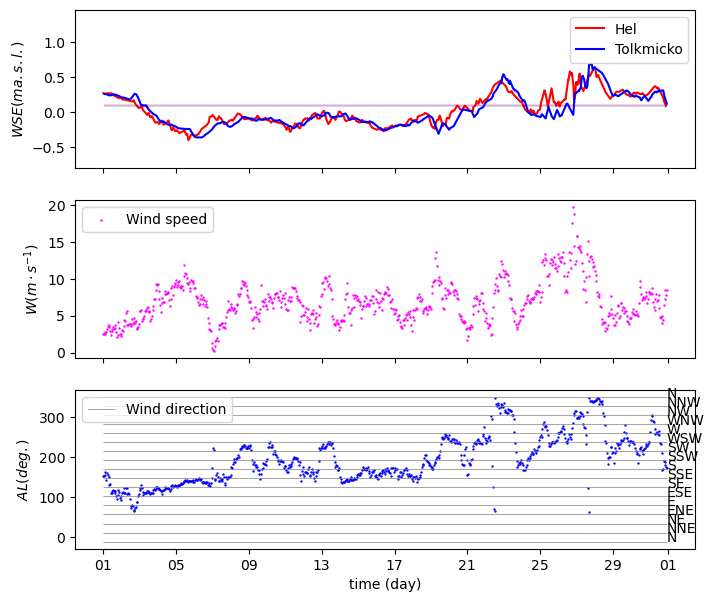

In [6]:
plt.rcParams['figure.figsize'] = [8, 7]
plt.rcParams['figure.dpi'] = 100 #

H_min = min([df_hel["wl"].min(),df_tol["wl"].min()])
H_max = max([df_hel["wl"].max(),df_tol["wl"].max()])

mean_tol = df_tol["wl"].mean()
mean_hel = df_hel["wl"].mean()

AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

        
yr = 2008
mnth = 1


f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

cond = (df_hel.index.year == yr) & (df_hel.index.month == mnth)
tmp_df = df_hel.loc[cond]
ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

cond = (df_tol.index.year == yr) & (df_tol.index.month == mnth)
tmp_df = df_tol.loc[cond]
ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

tmin = tmp_df.index.to_numpy().min()
tmax = tmp_df.index.to_numpy().max()

ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

ax1.set_ylim(H_min, H_max)

ax1.set_ylabel("$WSE (m a.s.l.)$")
ax1.legend(["Hel","Tolkmicko"])



#--------------------------------------------------------------------------
cond = (df_wind.index.year == yr) & (df_wind.index.month == mnth)
tmp_df = df_wind.loc[cond]


ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
ax2.set_ylabel("$W (m\cdot s^{-1})$")
ax2.legend(["Wind speed"])

#--------------------------------------------------------------------------


ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

for i in range(len(directions)):
    ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])
#ax3.text([tmp_df.index.to_numpy().max()] * 16,AL_bins[:-1],np.array(directions))


ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
ax3.set_ylabel("$AL (deg.)$")
ax3.legend(["Wind direction"])

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d')) 

_ = plt.xlabel("time (day)")
#plt.savefig('fig3.svg')

### Fig. 4

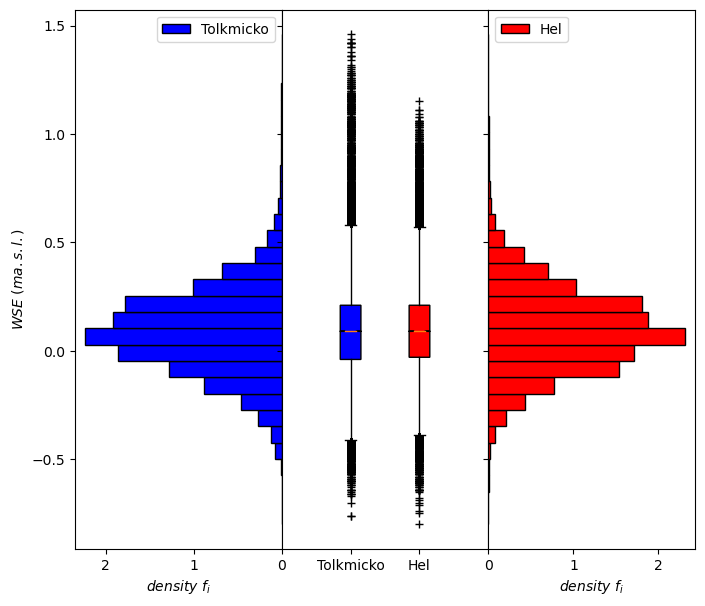

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(8, 7))
fig.subplots_adjust(hspace=0,wspace=0)

A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = (df_hel["stage"].to_numpy()-H0_hel)/100.

bins = list(np.histogram(np.concatenate((A,B)),bins = 30)[1])

axs[0].invert_xaxis()
axs[0].hist(A,bins=bins,density=True,color="blue",edgecolor="black",orientation="horizontal")
#axs[0].set_xlim(0.75,0.)
axs[0].legend(["Tolkmicko"],loc="upper right")
axs[0].set_ylabel("$WSE \ (m a.s.l.)$")
axs[0].set_xlabel("$density \  f_i$")

bp = axs[1].boxplot([A,B],notch = True, labels = ["Tolkmicko","Hel"],sym="+",patch_artist=True,
                    positions=[1,1.5])
color=["blue","red"]
for i,box in enumerate(bp['boxes']):
    box.set(facecolor=color[i] )
pass


axs[2].hist(B,bins=bins,density=True,color="red",edgecolor="black",orientation="horizontal")
#axs[2].set_xlim(0,0.75)
axs[2].legend(["Hel"],loc="upper left")
axs[2].set_xlabel("$density \  f_i$")
pass

#plt.savefig('fig4.svg')

### Fig. 5

In [8]:
def plot_event(dateA,dateB):

        f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

        cond = (df_hel.index >= dateA) & (df_hel.index <= dateB)
        tmp_df = df_hel.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

        mean_hel = np.mean(tmp_df["wl"].to_numpy())
        max_hel = np.max(tmp_df["wl"].to_numpy())
        
        cond = (df_tol.index >= dateA) & (df_tol.index <= dateB)
        tmp_df = df_tol.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

        mean_tol = np.mean(tmp_df["wl"].to_numpy())
        max_tol = np.max(tmp_df["wl"].to_numpy())        
        
        tmin = tmp_df.index.to_numpy().min()
        tmax = tmp_df.index.to_numpy().max()

        ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
        ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

        ax1.set_ylim(H_min, H_max)

        ax1.set_ylabel("$WSE \ (m \ a.s.l.)$")
        ax1.legend(["Hel","Tolkmicko"])
#--------------------------------------------------------------------------
        cond = (df_wind.index >= dateA) & (df_wind.index <= dateB)
        tmp_df = df_wind.loc[cond]

        ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
        ax2.set_ylabel("$W \ (m \cdot s^{-1})$")
        ax2.legend(["Wind speed"])

        mean_Ws = np.mean(tmp_df["W [m/s]"].to_numpy())
        max_Ws = np.max(tmp_df["W [m/s]"].to_numpy())
#--------------------------------------------------------------------------

        ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

        for i in range(len(directions)):
            ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
        ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])

        ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
        ax3.set_ylabel("$AL \ (deg.)$")
        ax3.legend(["Wind direction"])       

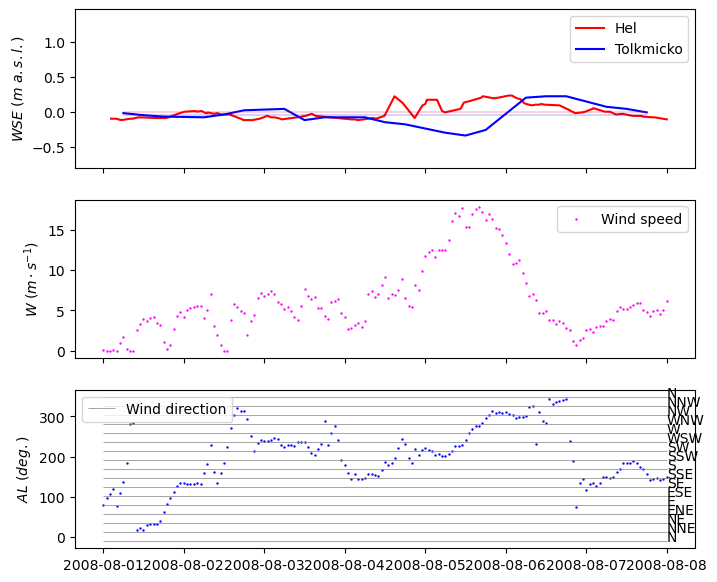

In [9]:
tR = ('2008-8-1 00:00', '2008-8-8 00:00') 
plot_event(tR[0],tR[1])
#plt.savefig('fig5.svg')

### Fig. 6

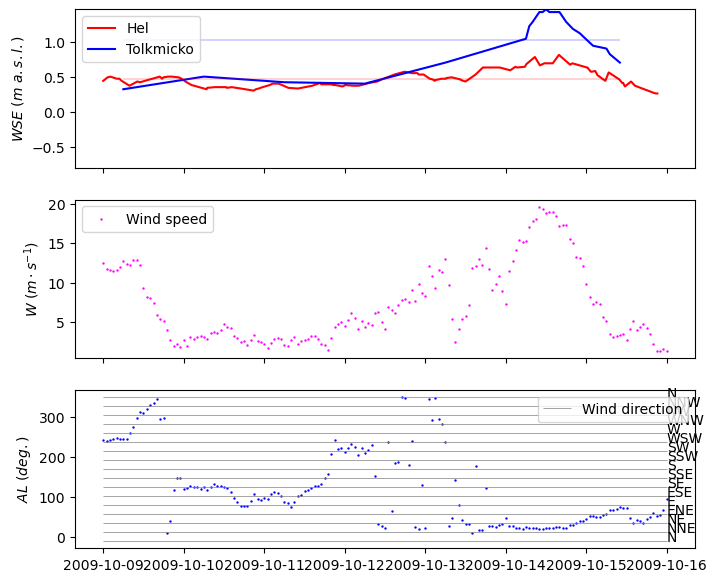

In [10]:
tR = ('2009-10-9 00:00', '2009-10-16 00:00') 
plot_event(tR[0],tR[1])
#plt.savefig('fig6.svg')

### Fig. 7.

In [11]:
datelist_detailed = [
    ("2008-01-22 12:00","2008-01-23 12:00"),
    ("2008-01-24 23:00","2008-01-27 00:00"),
    ("2008-02-14 12:00","2008-02-17 00:00"),
    ("2008-02-22 00:00","2008-02-24 00:00"),
    ("2008-02-27 06:00","2008-02-28 12:00"),
    ("2008-03-06 00:00","2008-03-07 06:00"),
    ("2008-03-12 20:00","2008-03-14 00:00"),
    ("2008-07-13 14:00","2008-07-14 12:00"),
    ("2008-07-23 00:00","2008-07-29 00:00"),
    ("2008-08-04 12:00","2008-08-06 08:00"),
    ("2008-08-29 12:00", "2008-08-31 00:00"),
    ("2008-10-01 18:00", "2008-10-03 06:00"),
    ("2008-11-11 10:00", "2008-11-12 02:00"),
    ("2008-11-17 06:00", "2008-11-17 18:00"),
    ("2008-12-22 06:00", "2008-12-22 18:00"),
    ("2008-12-22 18:00", "2008-12-24 18:00"),
    ("2009-06-22 23:00", "2009-06-26 12:00"),
    ("2009-10-04 06:00", "2009-10-05 06:00"),
    ("2009-10-13 06:00", "2009-10-15 12:00"),
    ("2010-08-25 03:00", "2010-08-25 23:00"),
    ("2010-09-01 12:00", "2010-09-03 12:00"),
    ("2010-09-16 00:00", "2010-09-19 12:00"),
    ("2010-09-28 12:00", "2010-09-29 18:00"),
    ("2010-11-12 12:00", "2010-11-13 09:00"),
    ("2010-11-29 00:00", "2010-12-01 00:00"),
    ("2011-02-08 00:00", "2011-02-09 12:00"),
    ("2011-09-14 06:00", "2011-09-16 00:00"),
    ("2011-11-26 06:00", "2011-11-28 09:00"),
    ("2011-12-18 06:00", "2011-12-19 18:00"),
    ("2012-04-08 06:00", "2012-04-09 00:00"),
    ("2012-06-25 00:00", "2012-06-26 18:00"),
    ("2012-07-14 18:00", "2012-07-15 06:00"),
    ("2012-10-05 12:00", "2012-10-06 12:00"),
    ("2013-06-04 12:00", "2013-06-06 00:00"),
    ("2013-07-12 12:00", "2013-07-13 12:00"),
    ("2013-09-03 06:00", "2013-09-04 00:00"),
    ("2013-09-24 00:00", "2013-09-25 00:00"),
    ("2013-11-27 00:00", "2013-11-28 12:00"),
    ("2013-12-05 12:00", "2013-12-07 00:00"),
    ("2014-01-12 18:00", "2014-01-13 12:00"),
    ("2014-03-15 00:00", "2014-03-15 18:00"),
    ("2014-04-15 12:00", "2014-04-16 12:00"),
    ("2014-09-23 00:00", "2014-09-24 00:00"),
    ("2014-12-12 12:00", "2014-12-14 00:00"),
    ("2015-01-02 00:00", "2015-01-04 00:00"),
    ("2015-01-10 15:00", "2015-01-12 00:00"),
    ("2015-02-08 00:00", "2015-02-09 12:00"),
    ("2015-03-30 06:00", "2015-03-31 12:00"),
    ("2015-07-30 00:00", "2015-07-31 06:00"),
    ("2015-11-08 00:00", "2015-11-08 15:00"),
    ("2016-06-17 18:00", "2016-06-18 12:00"),
    ("2016-10-03 12:00", "2016-10-07 00:00"),
    ("2016-10-27 12:00", "2016-10-29 12:00"),
    ("2017-01-03 12:00", "2017-01-04 18:00"),
    ("2017-01-04 18:00", "2017-01-07 12:00"),
    ("2017-10-02 00:00", "2017-10-07 00:00"),
    ('2017-10-29 12:00', '2017-10-31 12:00'),
    ('2017-11-10 00:00', '2017-11-13 00:00')
           ]

def wind_direction(AL_value):
    AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
    directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
    
    if AL_value >348.75:
        AL_value = 348.75 - AL_value
    
    for i in range(1,len(AL_bins)):
        if AL_value < AL_bins[i]:
            return(directions[i-1])
    return np.nan
      
def count_winds(AL):
    tmp = np.unique(list(map(wind_direction,AL)),return_counts=True)
    return list(zip(tmp[0],tmp[1]))

date_start = []
date_end = []
mean_Ws = []
max_Ws = []
mean_AL = []
dominating_wind_direction = []
mean_wl_hel = []
mean_wl_tol = []

max_wl_hel = []
max_wl_tol = []
duration = []

for dr in datelist_detailed:
    dateA = dr[0]
    dateB = dr[1]
    
    #duration.append(dt.datetime.fromisoformat(dateB)-dt.datetime.fromisoformat(dateA))
    duration.append(pd.Timestamp.fromisoformat(dateB) - pd.Timestamp.fromisoformat(dateA))
    
    date_start.append(dateA)
    date_end.append(dateB)

    cond = (df_hel.index >= dateA) & (df_hel.index <= dateB)
    tmp_df = df_hel.loc[cond]

    mean_wl_hel.append(np.mean(tmp_df["wl"].to_numpy()))
    max_wl_hel.append(np.max(tmp_df["wl"].to_numpy()))
        
    cond = (df_tol.index >= dateA) & (df_tol.index <= dateB)
    tmp_df = df_tol.loc[cond]
 
    mean_wl_tol.append(np.mean(tmp_df["wl"].to_numpy()))
    max_wl_tol.append(np.max(tmp_df["wl"].to_numpy()))    
    
    cond = (df_wind.index >= dateA) & (df_wind.index <= dateB)
    tmp_df = df_wind.loc[cond]
    mean_Ws.append(np.mean(tmp_df["W [m/s]"].to_numpy()))
    max_Ws.append(np.max(tmp_df["W [m/s]"].to_numpy()))
    mean_AL.append(np.mean(tmp_df["AL [st]"].to_numpy()))
    
    dominating_wind_direction.append(
    sorted(
        count_winds(tmp_df["AL [st]"].to_numpy())
            ,key=lambda x: x[1],reverse=True)[:3]
    )
    
df_wind_events = pd.DataFrame({"start":date_start,"end":date_end, "mean Ws":np.round(mean_Ws,2), "max Ws":max_Ws,
              "mean AL [deg]":np.round(mean_AL,2), "dom. wd":dominating_wind_direction, "meanTol":np.round(mean_wl_tol,2),
              "maxTol":max_wl_tol,"meanHel":np.round(mean_wl_hel,2),"maxHel":max_wl_hel,"duration":duration})


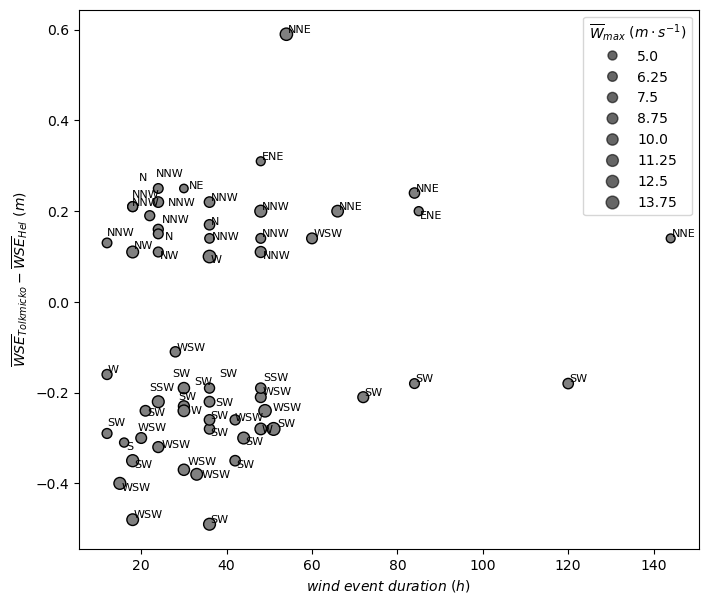

In [12]:
plt.rcParams['figure.figsize'] = [8, 7]
plt.rcParams['figure.dpi'] = 100 #

t = df_wind_events["duration"].dt.total_seconds() /3600 # in hours
mean_tol = df_wind_events["meanTol"].to_numpy()
mean_hel = df_wind_events["meanHel"].to_numpy()

winds = np.array(list(map(lambda x:x[0][0],df_wind_events["dom. wd"])))
wd = np.unique(winds)
wdict = { d:i for i,d in enumerate(wd)}

size = df_wind_events["max Ws"].to_numpy()

scatter = plt.scatter(t,mean_tol-mean_hel, color="gray", s = 4*size,edgecolor="black")
plt.xlabel("$wind\ event\ duration\ (h)$")
plt.ylabel("$\overline{WSE}_{Tolkmicko}-\overline{WSE}_{Hel}\ (m)$")


handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, np.array(range(20,61,5))/4, loc="upper right", title=r"$\overline{W}_{max} \ (m \cdot s^{-1})$")

texts = []
for x, y, s in zip(t,mean_tol-mean_hel, winds):
    texts.append(plt.text(x, y, s,fontsize=8))
    
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1))
scatter
#plt.savefig('fig7.svg')
pass

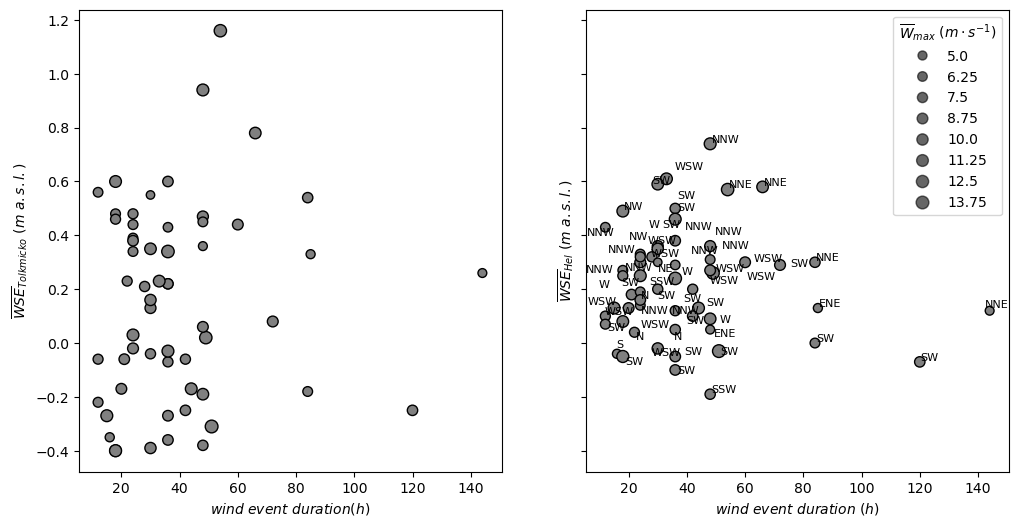

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 #

f, (ax1, ax2) = plt.subplots(1, 2,sharey=True)

t = df_wind_events["duration"].dt.total_seconds() /3600 # in hours # in hours
mean_tol = df_wind_events["meanTol"].to_numpy()
mean_hel = df_wind_events["meanHel"].to_numpy()

winds = np.array(list(map(lambda x:x[0][0],df_wind_events["dom. wd"])))
wd = np.unique(winds)
wdict = { d:i for i,d in enumerate(wd)}


size = df_wind_events["max Ws"].to_numpy()

scatter = ax1.scatter(t,mean_tol, color="gray", s = 4*size,edgecolor="black")
ax1.set_xlabel("$wind \ event \ duration (h)$")
ax1.set_ylabel("$\overline{WSE}_{Tolkmicko}\ (m\ a.s.l.)$")

texts = []
for x, y, s in zip(t,mean_tol, winds):
    texts.append(ax1.text(x, y, s,fontsize=8))
    
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1))

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, np.array(range(20,61,5))/4, loc="upper right", title=r"$\overline{W}_{max} \ (m \cdot s^{-1})$")



scatter = ax2.scatter(t,mean_hel, color="gray", s = 4*size,edgecolor="black")
ax2.set_xlabel("$wind \ event \ duration \ (h)$")
ax2.set_ylabel("$\overline{WSE}_{Hel}\ (m\ a.s.l.)$")

texts = []
for x, y, s in zip(t,mean_hel, winds):
    texts.append(ax2.text(x, y, s,fontsize=8))
    
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1))

scatter
#plt.savefig('fig8.svg')
pass

### Fig. 9
Fig. 9. was created in notebook `wind_analysis.ipynb`

### Fig 10

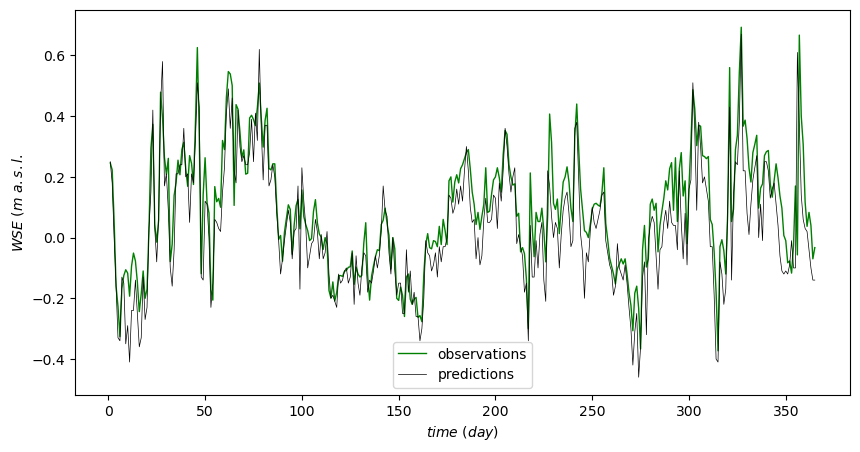

In [14]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100 #


df_error = pd.read_pickle(prepared_path+"df_error.pkl")
df_error["error"] = df_error["observations"] - df_error["predictions"]

cond = (df_error["date"].dt.year>2007)  & (df_error["date"].dt.year<=2008)

t = np.array(list(map(lambda d: d.timetuple().tm_yday,df_error.loc[cond,"date"].dt.to_pydatetime())))
obs = df_error.loc[cond,"observations"].to_numpy()
plt.plot(t,obs,"green",linewidth=1)

pred = df_error.loc[cond,"predictions"].to_numpy()
plt.plot(t,pred,"black",linewidth=0.5)

plt.xlabel("$time \  (day)$")
plt.ylabel("$WSE \ (m \ a.s.l.$")
plt.legend(["observations","predictions"])
#plt.savefig('fig10.svg')
pass

### Fig. 11

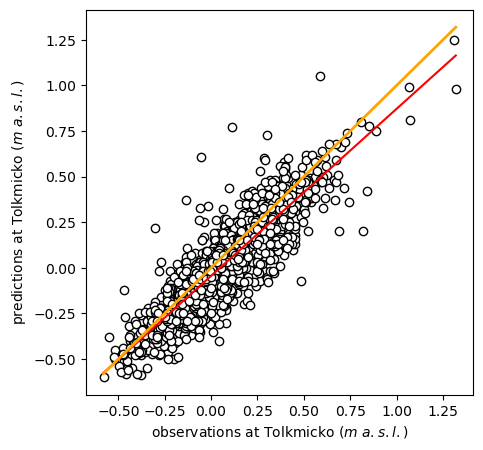

In [15]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100 #

x = df_error["observations"].to_numpy()
y = df_error["predictions"].to_numpy()

a, b, r_value, p_value, std_err = st.linregress(x,y)

plt.scatter(df_error["observations"],df_error["predictions"],edgecolor = "black",color="white")
plt.plot([min(x),max(x)],[a*min(x)+b,a*max(x)+b],color="red")
plt.xlabel("observations at Tolkmicko $(m \ a.s.l.)$")
plt.ylabel("predictions at Tolkmicko $(m \ a.s.l.)$")
plt.plot([min(x),max(x)],[min(x),max(x)],color="orange",linewidth=2)
#plt.savefig('fig11.svg')

### Fig. 12

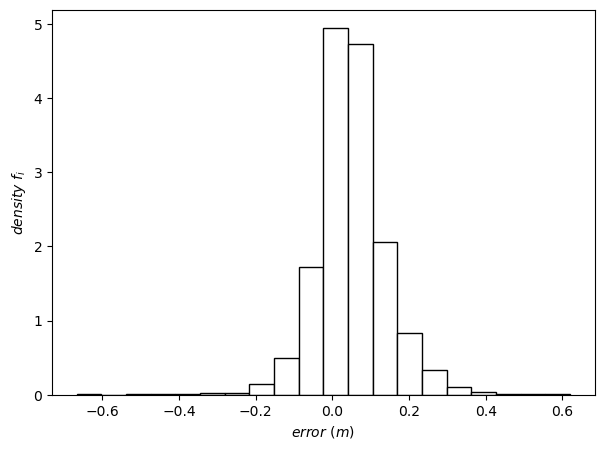

In [16]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 #

x = df_error["observations"]
y = df_error["predictions"]
err = x-y
plt.hist(err,bins=20,color="white",edgecolor="black",density=True)
plt.xlabel("$error \ (m)$")
plt.ylabel("$density \ f_i$")
#plt.savefig('fig12.svg')
pass

### Fig. 13

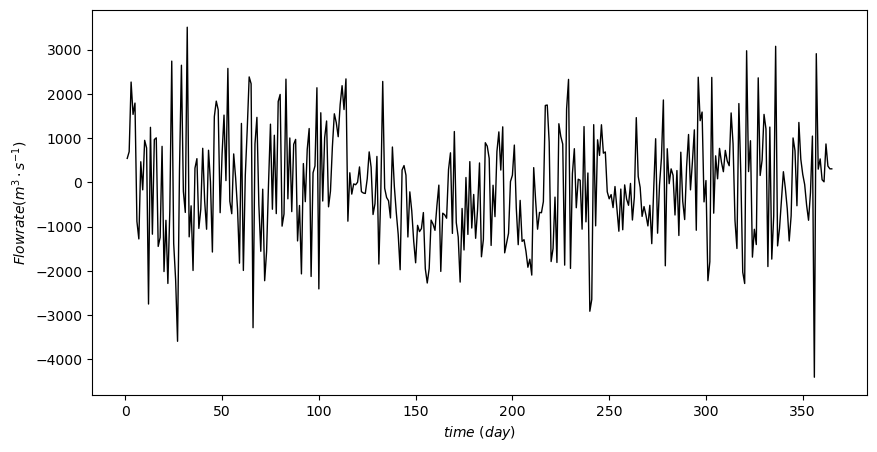

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100 #

df = pd.read_excel(path+"/wyn-Q-2008.xlsx")

t = df["day"].to_numpy()
q = df["Q"].to_numpy()
plt.plot(t,q,"black",linewidth=1)

plt.xlabel("$time \  (day)$")
plt.ylabel("$Flow rate (m^3\cdot s^{-1})$")
#plt.savefig('fig13.svg')
pass